2(a):  brightness enhancement of a specific range of gray levels

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

loading original image

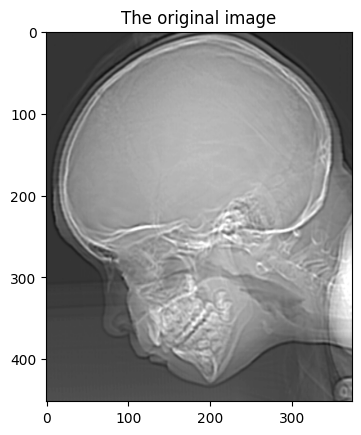

In [2]:
original_image = cv2.imread("./Skull 374x452.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("The original image")
plt.show()

enhancing brightness of a specific range of gray levels

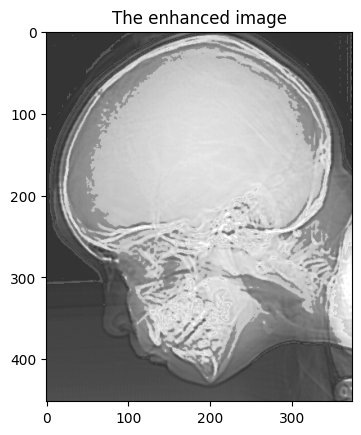

In [5]:
range_start, range_end, extra_brightness = 150, 200, 40
height, width = original_image.shape
Image = original_image

for r in range(height):
    for c in range(width):
        if(Image[r,c] >= range_start and Image[r,c] <= range_end):
            Image[r,c] += extra_brightness
        Image[r,c] = 255 if Image[r,c] > 255 else Image[r,c]

plt.imshow(cv2.cvtColor(Image, cv2.COLOR_BGR2RGB))
plt.title("The enhanced image")
plt.show()

2(b).  differentiate the results of power law & inverse logarithmic transformation
function for power law transformation

In [6]:
def power_law_transformation(image, gamma):
    transformed_image = image.copy()
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            pixel = float(image[r, c]) / 255.0
            transformed_image[r, c] = (pixel ** gamma) * 255
    
    return np.uint8(transformed_image)

function for inverse logarithm tranformation

In [7]:
def inverse_log_transformation(image):
    c = 255 / np.log(256)
    transformed_image = np.exp(image / c) - 1
    
    return np.uint8(transformed_image)

applying power law transformation ((γ < 0))

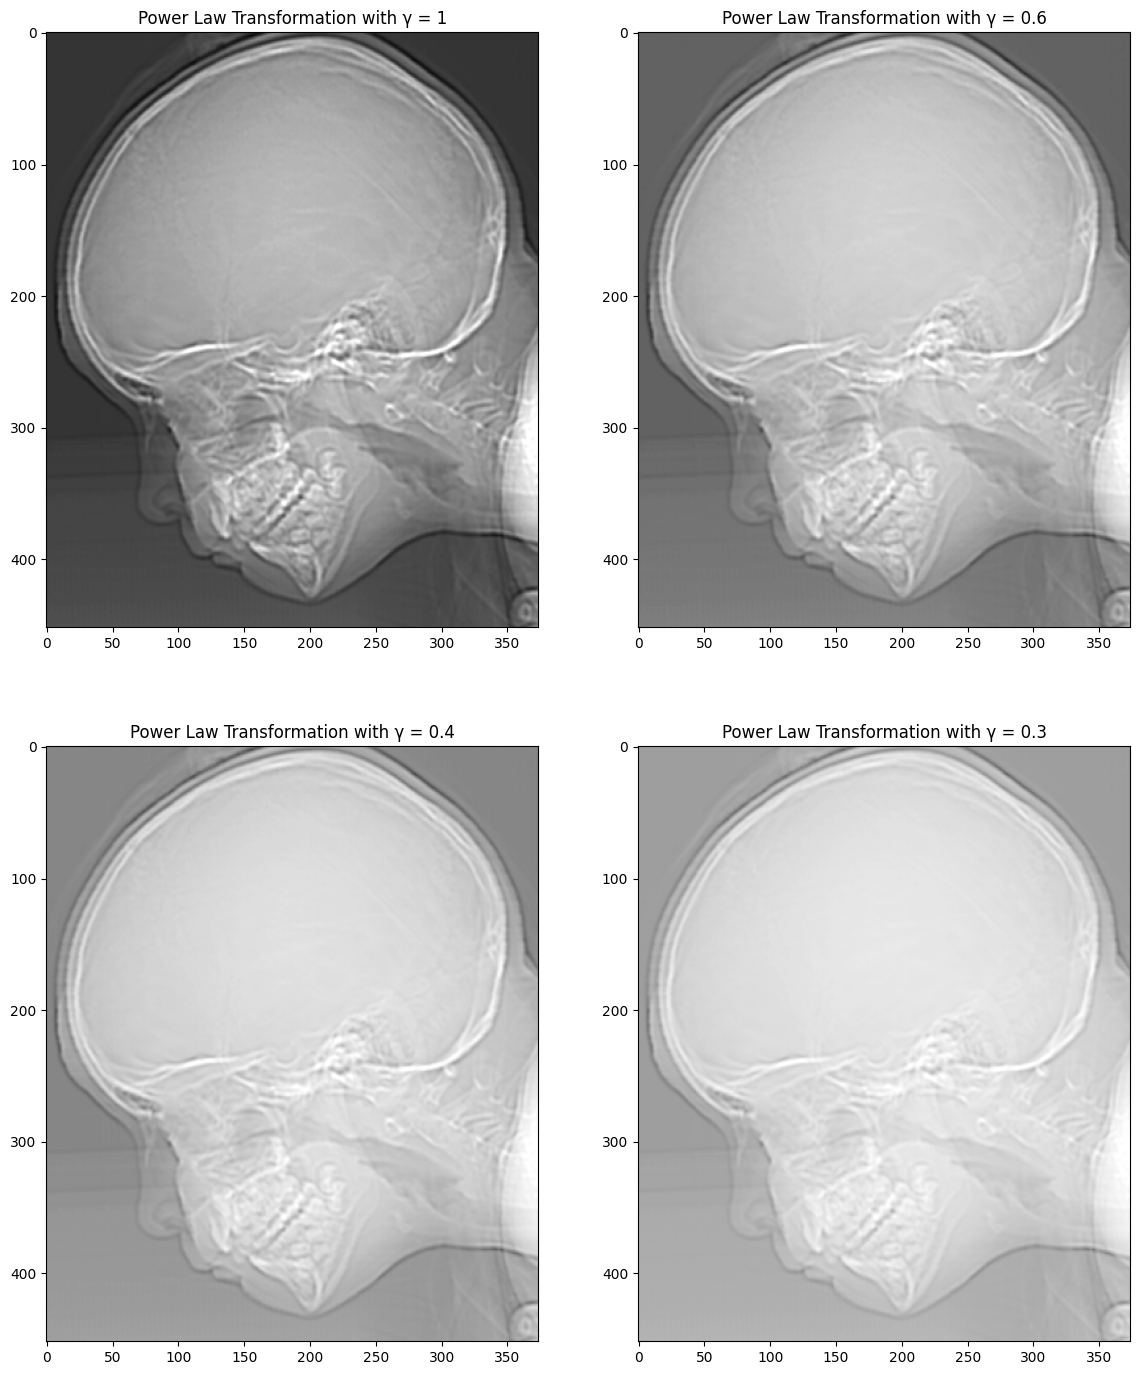

In [9]:
spine_image = cv2.imread("./Skull 374x452.tif", cv2.IMREAD_GRAYSCALE)
gammas, subplot_number = [1, 0.6, 0.4, 0.3], 1
plt.figure(figsize = (14, 17))

for gamma in (gammas):
    transformed_image = power_law_transformation(spine_image, gamma)
    plt.subplot(2, 2, subplot_number)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Power Law Transformation with γ = {gamma}")
    subplot_number += 1

plt.show()

Power Law Transformation (γ > 0)

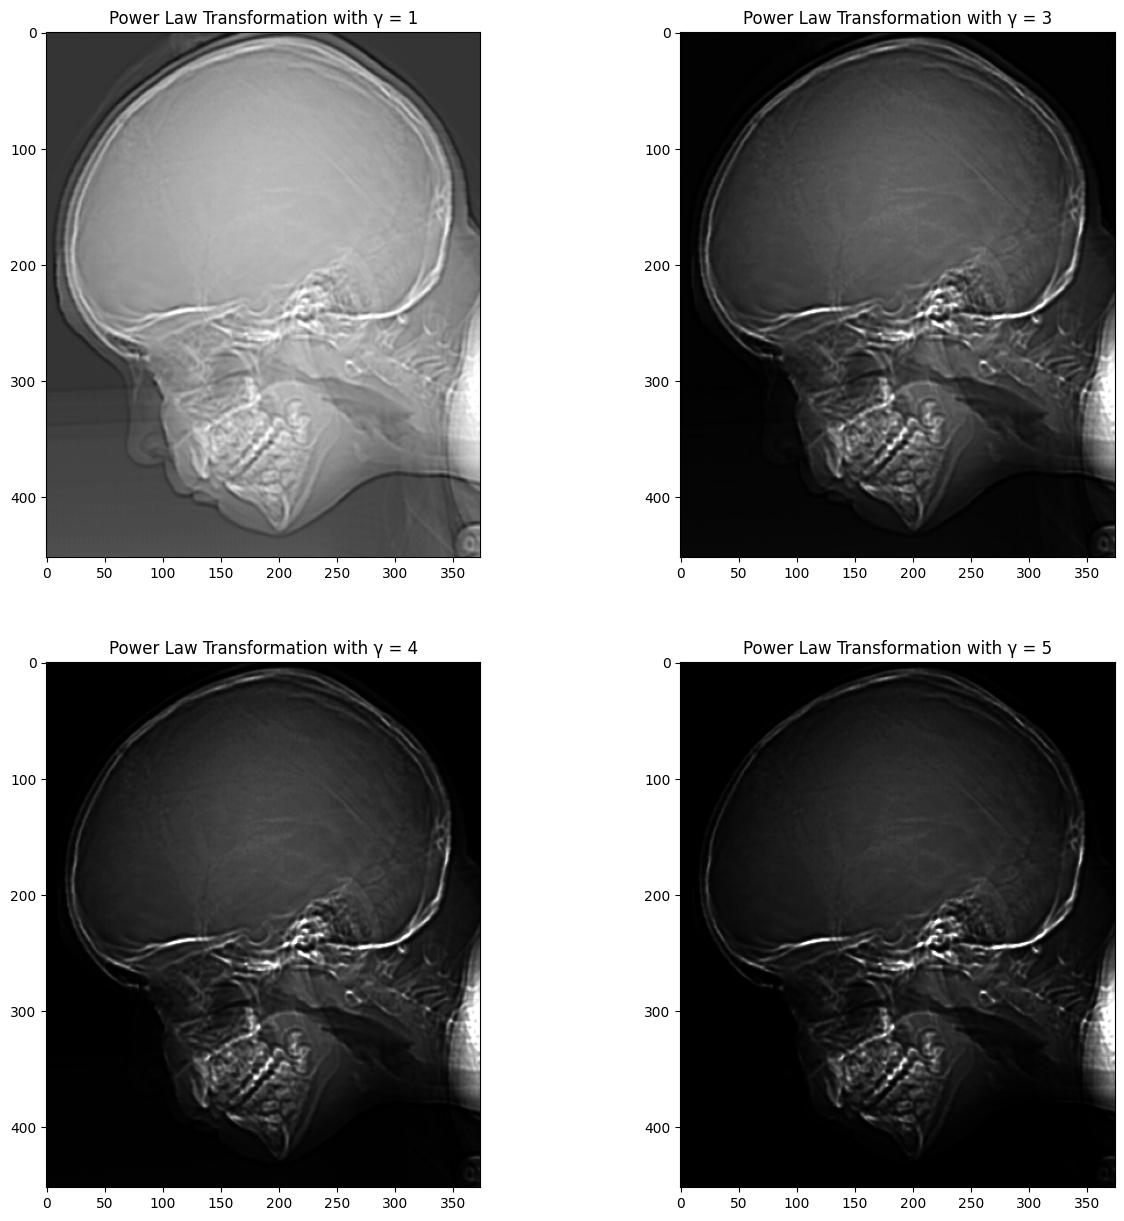

In [11]:
arial_image = cv2.imread("./Skull 374x452.tif", 0)
gammas = [1, 3, 4, 5]
subplot_number = 1
plt.figure(figsize = (15, 15))

for gamma in (gammas):
    transformed_image = power_law_transformation(arial_image, gamma)
    plt.subplot(2, 2, subplot_number)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Power Law Transformation with γ = {gamma}")
    subplot_number += 1

plt.show()

inverse log transformation

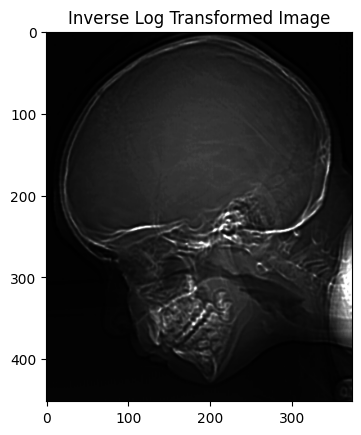

In [12]:
transformed_image = inverse_log_transformation(arial_image)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Inverse Log Transformed Image")
plt.show()

2(c).  find the difference image between the original & the image obtained by last three MSBs (bitplane slicing)
loading the original image

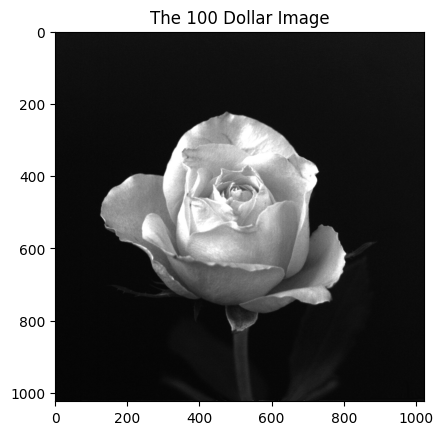

In [14]:
dollar_image = cv2.imread("./Rose 1024x1024.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(dollar_image, cv2.COLOR_BGR2RGB))
plt.title("The 100 Dollar Image")
plt.show()

image obtained by last 3-bits (MSBs)

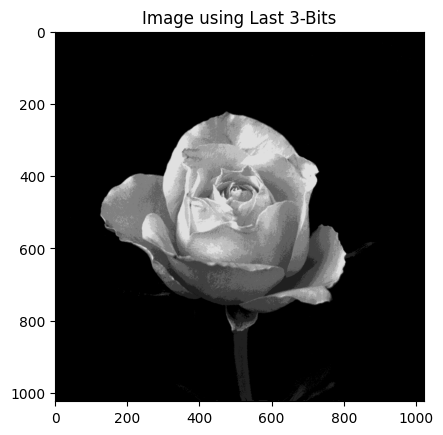

In [15]:
mask = "11100000"
three_bit_image = dollar_image & int(mask, 2)
plt.imshow(cv2.cvtColor(three_bit_image, cv2.COLOR_BGR2RGB))
plt.title("Image using Last 3-Bits")
plt.show()

finding the diffreence image

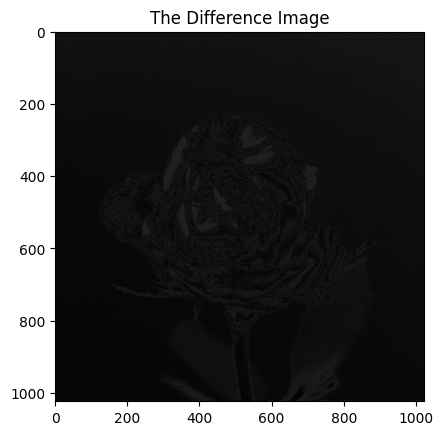

In [16]:
difference_image = cv2.absdiff(np.array(dollar_image), np.array(three_bit_image))
plt.imshow(cv2.cvtColor(difference_image, cv2.COLOR_BGR2RGB))
plt.title("The Difference Image")
plt.show()